<a href="https://colab.research.google.com/github/harshavardhangadila/Tensors-Operations/blob/main/Tensor%20Operations%20in%20PyTorch/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, reduce, repeat

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [3]:
# Basic Tensor Creation
scalar = torch.tensor(7)
vector = torch.tensor([1.0, 2.0, 3.0])
matrix = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
tensor_3d = torch.rand(2, 3, 4)

In [4]:
print(f"Scalar: {scalar}, Shape: {scalar.shape}")
print(f"Vector: {vector}, Shape: {vector.shape}")
print(f"Matrix:\n{matrix}\nShape: {matrix.shape}")
print(f"3D Tensor Shape: {tensor_3d.shape}")

Scalar: 7, Shape: torch.Size([])
Vector: tensor([1., 2., 3.]), Shape: torch.Size([3])
Matrix:
tensor([[1., 2.],
        [3., 4.]])
Shape: torch.Size([2, 2])
3D Tensor Shape: torch.Size([2, 3, 4])


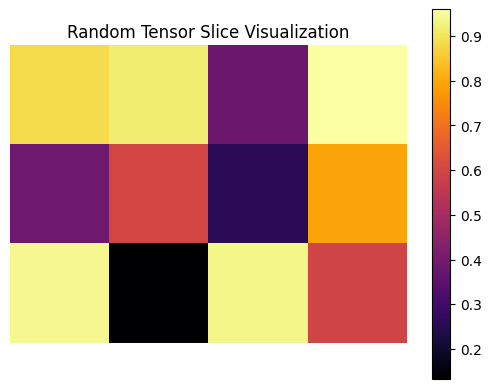

In [5]:
# Visualizing Tensor Slices
plt.imshow(tensor_3d[0].numpy(), cmap='inferno')
plt.title("Random Tensor Slice Visualization")
plt.axis('off')
plt.colorbar()
plt.show()

In [6]:
# Tensor Manipulations with Einops
img_tensor = torch.rand(3, 32, 32)
rearranged = rearrange(img_tensor, 'c h w -> h w c')

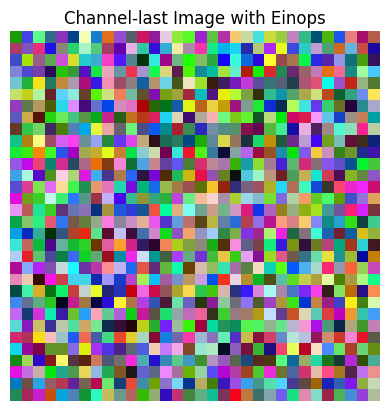

In [7]:
plt.imshow(rearranged.numpy())
plt.title("Channel-last Image with Einops")
plt.axis('off')
plt.show()

In [8]:
# Reducing Tensors with Einops
max_intensity = reduce(img_tensor, 'c h w -> h w', 'max')

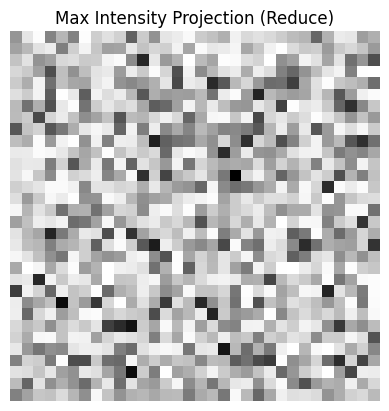

In [9]:
plt.imshow(max_intensity.numpy(), cmap='gray')
plt.title("Max Intensity Projection (Reduce)")
plt.axis('off')
plt.show()

In [10]:
# Conditional Selection with torch.where()
tensor = torch.arange(-5, 5)
mask = tensor > 0
result = torch.where(mask, tensor, torch.tensor(0))

print("Conditional Selection:", result.numpy())

Conditional Selection: [0 0 0 0 0 0 1 2 3 4]


In [15]:
# Fancy Indexing with scatter_()
# Create a 5x5 zero tensor
tensor = torch.zeros(5, 5, dtype=torch.float32)

# Correct indices: Ensure values are in the valid range (0 to 4)
indices = torch.tensor([[1, 2, 3], [2, 3, 4]])

# Ensure values have the same shape as indices
values = torch.tensor([[10, 20, 30], [40, 50, 60]], dtype=torch.float32)

# Apply scatter_() correctly
tensor.scatter_(1, indices, values)

print("After scatter_:\n", tensor)

After scatter_:
 tensor([[ 0., 10., 20., 30.,  0.],
        [ 0.,  0., 40., 50., 60.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


In [16]:
# Using as_strided() for Memory-efficient Views
tensor = torch.arange(9).reshape(3, 3)
strided_tensor = torch.as_strided(tensor, (2, 2), (3, 1))

print("Strided View:\n", strided_tensor)

Strided View:
 tensor([[0, 1],
        [3, 4]])


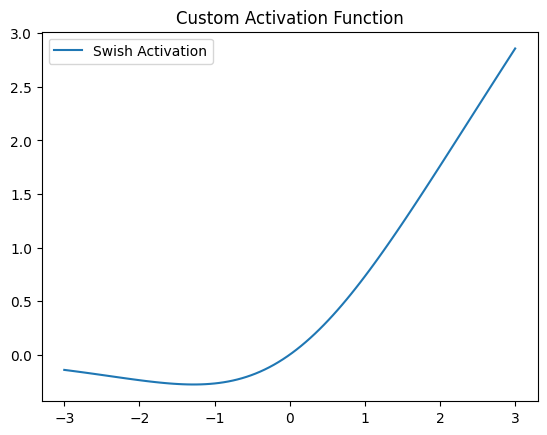

In [17]:
# Custom Activation Function - Swish
def swish_activation(x):
    return x * torch.sigmoid(x)

tensor = torch.linspace(-3, 3, 100)
activated_tensor = swish_activation(tensor)

plt.plot(tensor.numpy(), activated_tensor.numpy(), label="Swish Activation")
plt.legend()
plt.title("Custom Activation Function")
plt.show()

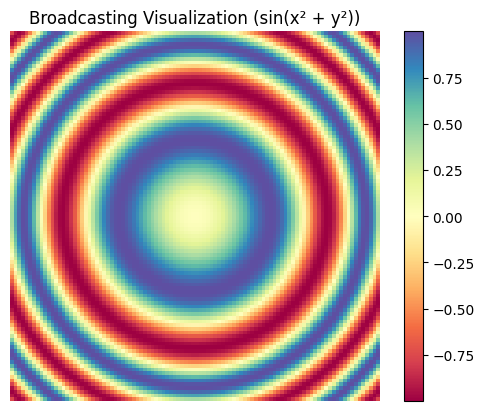

In [18]:
# Broadcasting in PyTorch
x = torch.linspace(-3, 3, 100)
y = torch.linspace(-3, 3, 100).unsqueeze(1)
z = torch.sin(x**2 + y**2)

plt.imshow(z.numpy(), cmap='Spectral')
plt.title("Broadcasting Visualization (sin(x² + y²))")
plt.axis('off')
plt.colorbar()
plt.show()


In [19]:
# Tensor Indexing & Slicing
tensor_4d = torch.rand(2, 3, 4, 5)
slice_1 = tensor_4d[0]
slice_2 = tensor_4d[:, 1:3, :, :]
selected_elements = tensor_4d[:, [0, 2], :, :]

print("Slice Shapes:", slice_1.shape, slice_2.shape, selected_elements.shape)

Slice Shapes: torch.Size([3, 4, 5]) torch.Size([2, 2, 4, 5]) torch.Size([2, 2, 4, 5])


In [20]:
# In-place Tensor Operations
tensor = torch.tensor([1, 2, 3], dtype=torch.float32)
tensor.add_(5).mul_(2)
print("After in-place operations:", tensor.numpy())

After in-place operations: [12. 14. 16.]


In [21]:
# Memory Sharing with storage()
tensor_a = torch.tensor([1, 2, 3])
tensor_b = tensor_a.view(-1)
print("Do they share memory?:", tensor_a.storage().data_ptr() == tensor_b.storage().data_ptr())

Do they share memory?: True


<ipython-input-21-257346f0df4c>:4: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print("Do they share memory?:", tensor_a.storage().data_ptr() == tensor_b.storage().data_ptr())


In [22]:
# Expanding vs Repeating Tensors
tensor = torch.tensor([[1], [2], [3]])
expanded = tensor.expand(3, 4)
repeated = tensor.repeat(1, 4)

print("Expanded Shape:", expanded.shape)
print("Repeated Shape:", repeated.shape)


Expanded Shape: torch.Size([3, 4])
Repeated Shape: torch.Size([3, 4])


In [23]:
# Computing Softmax
def softmax(x):
    exp_x = torch.exp(x - torch.max(x))
    return exp_x / torch.sum(exp_x)

logits = torch.tensor([2.0, 1.0, 0.1])
probabilities = softmax(logits)

print("Softmax Probabilities:", probabilities.numpy())

Softmax Probabilities: [0.6590012 0.242433  0.0985659]


In [24]:
# Matrix Factorization with SVD
matrix = torch.randn(5, 3)
U, S, V = torch.svd(matrix)

print("Singular Values:", S)

Singular Values: tensor([3.9376, 2.0806, 1.0444])


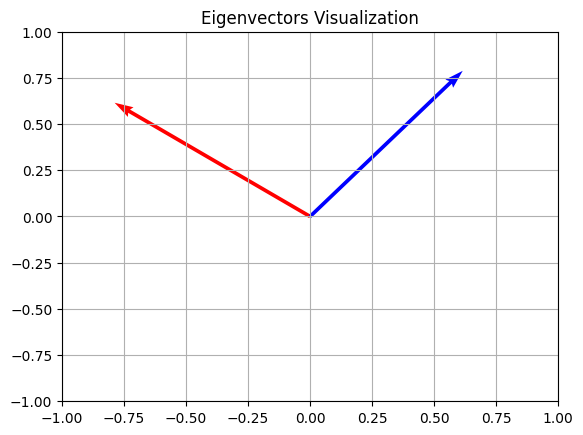

In [25]:
# Eigen Decomposition & Visualization
sym_tensor = torch.tensor([[4, 2], [2, 5]], dtype=torch.float32)
eigvals, eigvecs = torch.linalg.eigh(sym_tensor)

plt.quiver([0, 0], [0, 0], eigvecs[0, :], eigvecs[1, :], angles='xy', scale_units='xy', scale=1, color=['r','b'])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("Eigenvectors Visualization")
plt.grid()
plt.show()

In [26]:
# QR Decomposition
matrix = torch.rand(4, 4)
Q, R = torch.linalg.qr(matrix)
print("Q Matrix:\n", Q)
print("R Matrix:\n", R)

Q Matrix:
 tensor([[-0.6438, -0.0634, -0.0477, -0.7611],
        [-0.3221, -0.8467, -0.2273,  0.3572],
        [-0.5496,  0.5249, -0.4684,  0.4506],
        [-0.4239,  0.0590,  0.8525,  0.3002]])
R Matrix:
 tensor([[-1.3631, -0.8096, -1.0450, -0.6377],
        [ 0.0000, -0.4507,  0.0264, -0.5130],
        [ 0.0000,  0.0000,  0.6261, -0.3627],
        [ 0.0000,  0.0000,  0.0000,  0.2915]])


In [27]:
# Gradient Computation with Autograd
x = torch.tensor([2.0], requires_grad=True)
y = x**3 + 2*x**2 + 10
y.backward()

print("Gradient dy/dx:", x.grad.item())

Gradient dy/dx: 20.0


In [28]:
# Unfolding for Image Patches
input_tensor = torch.arange(1, 17).float().reshape(1, 1, 4, 4)
patches = input_tensor.unfold(2, 2, 2).unfold(3, 2, 2)

print("Extracted Patches Shape:", patches.shape)

Extracted Patches Shape: torch.Size([1, 1, 2, 2, 2, 2])


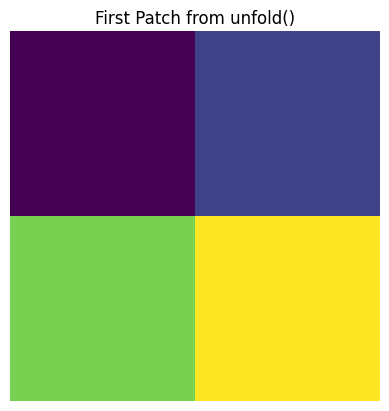

In [29]:
# Visualizing the first patch
first_patch = patches[0, 0, 0, 0]
plt.imshow(first_patch.numpy(), cmap='viridis')
plt.title("First Patch from unfold()")
plt.axis('off')
plt.show()

In [31]:
# Broadcasting & Advanced Indexing
# Create tensors of different shapes
A = torch.tensor([1, 2, 3])
B = torch.tensor([[1], [2], [3]])

# Broadcasting Example (Element-wise addition)
broadcast_result = A + B
print("Broadcasted Tensor:\n", broadcast_result)

Broadcasted Tensor:
 tensor([[2, 3, 4],
        [3, 4, 5],
        [4, 5, 6]])


In [32]:
#Dynamic Tensor Reshaping (view(), reshape(), squeeze(), unsqueeze())
tensor = torch.rand(2, 1, 4)  # Shape: (2,1,4)

# Remove the dimension of size 1
squeezed = tensor.squeeze()
print("Squeezed Shape:", squeezed.shape)

# Add a new dimension
unsqueezed = squeezed.unsqueeze(1)
print("Unsqueezed Shape:", unsqueezed.shape)

# Reshape the tensor dynamically
reshaped = tensor.reshape(4, 2)
print("Reshaped Shape:", reshaped.shape)

Squeezed Shape: torch.Size([2, 4])
Unsqueezed Shape: torch.Size([2, 1, 4])
Reshaped Shape: torch.Size([4, 2])


In [33]:
#Automatic Differentiation in PyTorch
x = torch.tensor([2.0], requires_grad=True)
y = x**3 + 2*x**2 + 10

y.backward()  # Compute gradient

print("Gradient dy/dx:", x.grad.item())  # Derivative of y w.r.t. x

Gradient dy/dx: 20.0


In [34]:
#Matrix Factorization - Cholesky Decomposition
A = torch.tensor([[4.0, 2.0], [2.0, 3.0]])
L = torch.linalg.cholesky(A)

print("Cholesky Decomposition Result:\n", L)

Cholesky Decomposition Result:
 tensor([[2.0000, 0.0000],
        [1.0000, 1.4142]])


In [35]:
#Sparse Tensors for Memory Efficiency
indices = torch.tensor([[0, 1, 1], [2, 0, 2]])  # Positions of non-zero elements
values = torch.tensor([3, 4, 5])  # Values at those positions

sparse_tensor = torch.sparse_coo_tensor(indices, values, (3, 3))
print("Sparse Tensor:\n", sparse_tensor)

Sparse Tensor:
 tensor(indices=tensor([[0, 1, 1],
                       [2, 0, 2]]),
       values=tensor([3, 4, 5]),
       size=(3, 3), nnz=3, layout=torch.sparse_coo)


In [36]:
#Efficient Batch Processing using torch.vmap()
# Function to square each element
def square_fn(x):
    return x**2

batched_tensor = torch.rand(5, 3)  # Batch size 5, each tensor of size 3
result = torch.vmap(square_fn)(batched_tensor)

print("Vectorized Computation Result:\n", result)

Vectorized Computation Result:
 tensor([[5.0568e-02, 1.4911e-01, 3.4224e-04],
        [1.6065e-02, 5.7419e-03, 5.1572e-01],
        [9.7498e-02, 5.7996e-01, 5.2453e-02],
        [1.4146e-01, 3.1419e-01, 8.4449e-01],
        [1.3340e-01, 6.2388e-01, 4.0696e-01]])


In [37]:
#Convolutions Using unfold()
input_tensor = torch.arange(1, 17).float().reshape(1, 1, 4, 4)
patches = input_tensor.unfold(2, 2, 2).unfold(3, 2, 2)

print("Extracted Image Patches Shape:", patches.shape)


Extracted Image Patches Shape: torch.Size([1, 1, 2, 2, 2, 2])


In [38]:
#Complex Numbers and Fourier Transform
# Create a complex tensor
complex_tensor = torch.tensor([1 + 2j, 3 + 4j])

# Compute Fast Fourier Transform (FFT)
fft_result = torch.fft.fft(complex_tensor)

print("FFT of Complex Tensor:\n", fft_result)

FFT of Complex Tensor:
 tensor([ 4.+6.j, -2.-2.j])


In [39]:
#Randomized Tensor Sampling Techniques
# Generate 5 random samples from a normal distribution
normal_samples = torch.normal(mean=0, std=1, size=(5,))
print("Random Normal Samples:\n", normal_samples)

# Generate multinomial samples (categorical distribution)
probs = torch.tensor([0.1, 0.3, 0.6])
samples = torch.multinomial(probs, 5, replacement=True)

print("Multinomial Samples:\n", samples)

Random Normal Samples:
 tensor([-0.3514, -1.2746,  0.5725,  0.4522, -0.4391])
Multinomial Samples:
 tensor([0, 1, 1, 2, 2])


In [40]:
#Custom Autograd Function for Gradient Computation
class CustomFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input**3  # f(x) = x^3

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = 3 * input**2 * grad_output  # df/dx = 3x^2
        return grad_input

x = torch.tensor([2.0], requires_grad=True)
y = CustomFunction.apply(x)
y.backward()

print("Gradient using Custom Function:", x.grad.item())

Gradient using Custom Function: 12.0
